<h1>A Jornada do Campeão:
Uma Análise Detalhada do Valorant Champion Tour</h1>

<h4>Integrantes:</h4>
<ul><li>Carlos Vitoro Freitas Santos</li>
<li>Gabriele Targino Eugênio Soares Chaves</li>
<li>Pedro Lucas Simoes Cabral</li>
<li>Wesley Henrique da Silva Vieira</li></ul>

<h2>1. Introdução</h2>

O desenvolvimento deste projeto foi motivado pela necessidade de recolher insights sobre o jogo Valorant. À medida que a popularidade dos jogos cresce e os cenários se tornam mais competitivos, reconhecemos a oportunidade de analisar muitos aspectos diferentes do jogo, incluindo a seleção de agentes, a dinâmica do jogo em diferentes mapas e o desempenho dos jogadores em competições internacionais. Este documento descreve um plano para atingir esses objetivos dentro de um escopo definido.

<h3>1.1 Objetivo Geral</h3>

<ul><li>Levantar insights sobre o valorant a partir dos dados do Valorant Champions Tour</li></ul>

<h3>1.2 Objetivos Especificos</h3>

<ul>
<li>Analisar a evolução das preferências de agentes ao longo do tempo e identificar tendências de popularidade.</li>
<li>Calcular a distribuição percentual de vitórias na defesa e no ataque para cada mapa</li>
<li>Identificar o jogador com melhor desempenho geral, levando em consideração seu impacto nas partidas e contribuição para o sucesso da equipe.</li>
<li>Comparar a eficácia das equipes brasileiras em nos campeonatos internacionais</li>
</ul>

<h3>1.3 Perguntas a Serem Respondidas</h3>
<ol>
<li>Quais agentes estão sendo escolhidos com mais frequência ao longo do tempo?</li>
<li>Qual é a distribuição percentual de vitórias na defesa e no ataque nos mapas jogados?</li>
<li>Qual o melhor jogador de valorant nos campeonatos internacionais durantes os anos?</li>
<li>Qual o desempenho dos times brasileiros nos campeonatos internacionais durantes os anos?</li>
</ol>

<h3>1.4 Bibliotecas utilizadas:</h3>

As bibliotecas utilizadas estão contidas no arquivo requirements.txt no diretorio do presente trabalho.


>pip install -r requirements.txt


<h2>2. Desenvolvimento</h2>
<h3>2.1 Importando Bibliotecas</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
from scipy.stats import linregress
from sklearn.preprocessing import LabelEncoder
import funcoes as func
import numpy as np

# Remoção apenas para fins estéticos do Notebook
import warnings
warnings.filterwarnings('ignore')

# Adicionando paleta para fins estéticos
personalizado_paleta = ['#1f77b4', '#ff7f0e', '#666666']

<h3>2.2 Dicionário de Termos</h3>

In [2]:
pd.read_csv("datasets-criados/termos.csv")

,Termo,Descrição
0,Kills,Abates
1,Deaths,Mortes
2,Assists,Assistências
3,K/D,Abates / Mortes
4,Kills / Round,Abates por rodada
5,Deaths / Round,Mortes por rodada
6,Headshots,Tiros na cabeça
7,Damage,Dano causado
8,Econ Rating,Economia
9,Pick Rate,Taxa de escolha


<h3>2.3 Descrição dos dados usados</h3>

"A pasta de partidas contém escolhas e banimentos de times, sua economia em cada rodada de uma partida, suas estatísticas de economia em uma partida, desempenho de mortes de jogadores em outros jogadores, estatísticas de mortes de jogadores, mapas que foram jogados em uma partida, as pontuações do mapa, estatísticas de visão geral dos jogadores, um jogador mata o desempenho dos jogadores e de seu agente em uma rodada específica, pontuações das partidas e seus resultados, uma lista de nomes abreviados de times com seus nomes completos, a contagem do método que ocorreu para um time em uma partida que eles jogaram e seu número redondo.

A pasta de estatísticas do jogador contém apenas estatísticas do jogador.

A pasta ids contém os ids dos times, jogadores, torneios, fases, tipos de partidas, partidas e jogos.

A pasta all_ids contém todos os IDs e o nome abreviado da equipe com seu nome completo." *

<h6>*A descrição do dataset foi feita por seu criador, Ryan Luong.</h6>

<h3>2.4 Pré-processamento</h3>

Os conjuntos de dados listados abaixo foram sujeitos a filtragens dos datasets disponibilizados do Valorant Champions Tour para gerar os novos conjuntos de dados com os quais estaremos trabalhando. Para acessá-los basta clicar em cima.

<ul>
<li><a href='vct_2021.ipynb' style='color: red;'>VCT 2021</a></li>
<li><a href='vct_2022.ipynb' style='color: red;'>VCT 2022</a></li>
<li><a href='vct_2023.ipynb' style='color: red;'>VCT 2023</a></li>
</ul>


<h3>2.5 Importandos os datasets criados</h3>

Os conjuntos de dados abaixo serão utilizados para as análises subsequentes durante o projeto.

In [3]:
agents_vct2021 = pd.read_csv('datasets-criados/agents_pick_vct2021.csv')
agents_vct2022 = pd.read_csv('datasets-criados/agents_pick_vct2022.csv')
agents_vct2023 = pd.read_csv('datasets-criados/agents_pick_vct2023.csv')

maps_vct2021 = pd.read_csv('datasets-criados/maps_vct2021.csv')
maps_vct2022 = pd.read_csv('datasets-criados/maps_vct2022.csv')
maps_vct2023 = pd.read_csv('datasets-criados/maps_vct2023.csv')

best_player_vct2021 = pd.read_csv('datasets-criados/best_player_vct2021.csv')
best_player_vct2022 = pd.read_csv('datasets-criados/best_player_vct2022.csv')
best_player_vct2023 = pd.read_csv('datasets-criados/best_player_vct2023.csv')

overview2021 = pd.read_csv("dataset/vct_2021/matches/overview.csv")
overview2022 = pd.read_csv("dataset/vct_2022/matches/overview.csv")
overview2023 = pd.read_csv("dataset/vct_2023/matches/overview.csv")


<br>
<h2>3. Visualização de dados</h2>


Esta etapa foi estruturada a fim de responder as pergutas feitas inicialmente.

<h3>3.1 Quais agentes estão sendo escolhidos com mais frequência ao longo do tempo?</h3>


Neste momento, iniciaremos a análise e visualização dos dados. O primeiro conjunto de dados a ser avaliado será a porcentagem de escolha dos agentes.

Aplicando a função merge às tabelas dos agentes_vct2021, agentes_vct2022 e agentes_vct2023, obteremos uma visualização lado a lado dos dados importados.

In [4]:
agentes_2021_2022 = pd.merge(agents_vct2021, agents_vct2022, on='Agent', how='inner')
agentes_2021_2022_2023 = pd.merge(agentes_2021_2022, agents_vct2023, on='Agent', how='inner')
agentes_2021_2022_2023.head(10)

,Agent,Pick Rate_x,Pick Rate_y,Pick Rate
0,astra,65.0,20.0,29.50
1,breach,13.4,28.4,32.00
2,brimstone,1.6,21.0,17.75
3,chamber,0.0,74.6,10.75
4,cypher,34.6,4.4,15.50
5,deadlock,0.0,0.0,0.00
6,fade,0.0,45.0,10.00
7,gekko,0.0,0.0,2.75
8,harbor,0.0,0.0,9.50
9,iso,0.0,0.0,0.00


Os dados já estão limpos, pois passaram pelo filtro. Para uma melhor visualização, iremos renomear as colunas para "Pick Rate_2021", "Pick Rate_2022" e "Pick Rate_2023" para refletir os anos correspondentes.

In [5]:
agentes_2021_2022_2023.columns = ['Agent', 'Pick Rate 2021', 'Pick Rate 2022', 'Pick Rate 2023']
agentes_2021_2022_2023.head(5)

,Agent,Pick Rate 2021,Pick Rate 2022,Pick Rate 2023
0,astra,65.0,20.0,29.50
1,breach,13.4,28.4,32.00
2,brimstone,1.6,21.0,17.75
3,chamber,0.0,74.6,10.75
4,cypher,34.6,4.4,15.50


<h5>3.1.1 Variação da escolha dos agentes durantes os anos</h5>

Com o intuito de visualizar os dados de `agentes_2021_2022_2023`, foi criado um boxplot para observar a mediana, média, quartis e possíveis outliers. Para isso, iremos concatenar as três tabelas dos anos.

In [6]:
agents_vct = pd.concat([agents_vct2021, agents_vct2022, agents_vct2023])

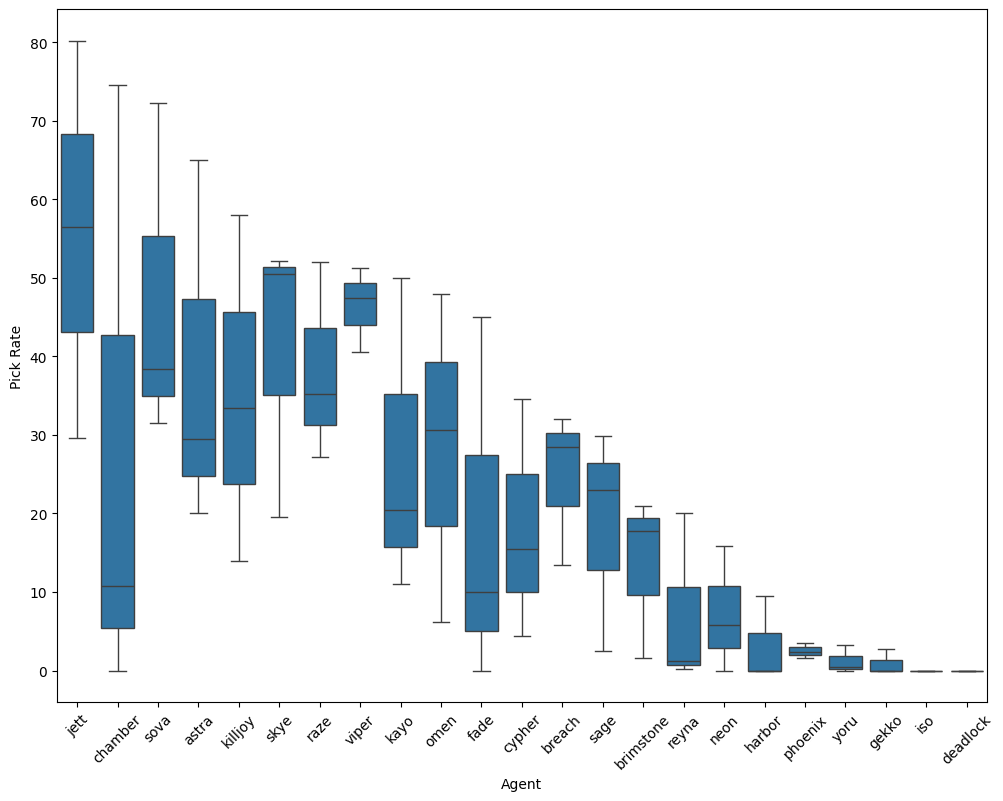

In [7]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Agent', y='Pick Rate', data=agents_vct, order=agents_vct.sort_values('Pick Rate', ascending=False)['Agent'])
plt.xticks(rotation=45)
plt.show()

Depois de analisar o boxplot, notamos que alguns agentes apresentam uma grande variação e medianas bastante baixas.

<h5>3.1.2 Porcentagem de Escolha de cada agente</h5>

Neste gráfico, foi adicionada a função de cada agente para uma melhor visualização, permitindo-nos observar a porcentagem geral de escolha de cada um. Destaca-se a taxa de escolha dos agentes "Viper" e "Sova", enquanto a "Jett" se destaca ainda mais, sendo a agente mais escolhida. Esses agentes desempenham papéis importantes em diferentes composições por mapas, com a Jett atuando como duelista, a Viper como controladora e o Sova como iniciador. Essa composição é considerada completa e funcional em quase todos os mapas do jogo.

Por outro lado, alguns agentes, como Yoru, Reyna e Phoenix, possuem uma taxa de escolha mais baixa devido às suas habilidades que não são tão eficazes para o trabalho em equipe. Esses agentes são mais adequados para um estilo de jogo individual, o que explica sua menor popularidade no cenário competitivo.

Outros agentes, como Iso, Harbor, Gekko e Deadlock, têm uma baixa taxa de escolha porque são personagens lançados entre 2022 e 2023 e ainda não foram amplamente utilizados em contextos competitivos. Consequentemente, suas porcentagens de escolha são reduzidas ou mesmo nulas.

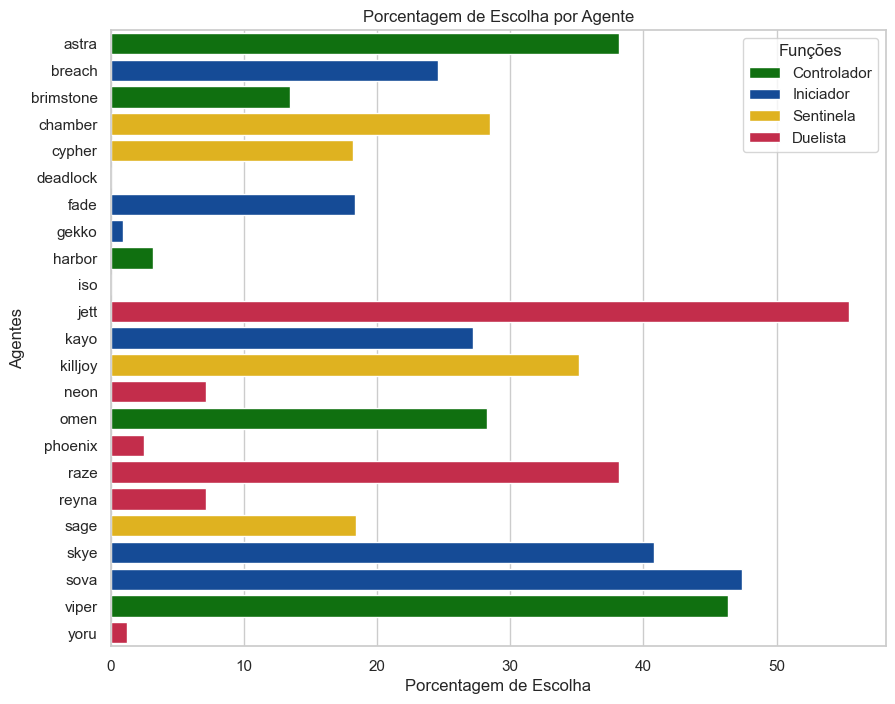

In [8]:
roles = {
    'astra': 'Controlador','breach': 'Iniciador','brimstone': 'Controlador','chamber': 'Sentinela','cypher': 'Sentinela','deadlock': 'Sentinela',
    'fade': 'Iniciador','gekko': 'Iniciador','harbor': 'Controlador','iso': 'Duelista','jett': 'Duelista','kayo': 'Iniciador','killjoy': 'Sentinela',
    'neon': 'Duelista','omen': 'Controlador','phoenix': 'Duelista','raze': 'Duelista','reyna': 'Duelista','sage': 'Sentinela','skye': 'Iniciador',
    'sova': 'Iniciador','viper': 'Controlador','yoru': 'Duelista'
}

agentes_2021_2022_2023['Pick Rate (%)'] = agentes_2021_2022_2023[['Pick Rate 2021', 'Pick Rate 2022', 'Pick Rate 2023']].mean(axis=1).round(2)
nova_tabela_agent = pd.concat([agentes_2021_2022_2023['Agent'], agentes_2021_2022_2023['Pick Rate (%)']], axis=1)

nova_tabela_agent['Role'] = nova_tabela_agent['Agent'].map(roles)

func.mostraGraficoAgent(nova_tabela_agent)

<h5>3.1.3 Agentes mais escolhidos por função </h5>

In [9]:
max_pick_rate_agents = nova_tabela_agent.loc[nova_tabela_agent.groupby('Role')['Pick Rate (%)'].idxmax()]

print(max_pick_rate_agents)

      Agent  Pick Rate (%)         Role
21    viper          46.37  Controlador
10     jett          55.43     Duelista
20     sova          47.37    Iniciador
12  killjoy          35.13    Sentinela


<img src='assets/img-agents/Agentes.png'></img>

<h5>3.1.4 Agentes mais escolhidos durante os anos </h5>


Ao longo dos anos de 2021 a 2023, podemos perceber a variação do meta no jogo, ou seja, os agentes mais frequentemente escolhidos. Em 2021, o agente Chamber ainda não havia sido lançado, portanto sua porcentagem era nula. Já em 2022, ele subiu rapidamente do último para o primeiro lugar, devido às suas habilidades serem muito eficazes para a defesa, sendo sua especialidade como sentinela. No entanto, em 2023, ele sofreu uma queda drástica devido aos nerfs que suas habilidades receberam. Com isso, podemos concluir que o meta das escolhas dos agentes está em constante mudança, seja por buffs ou nerfs.

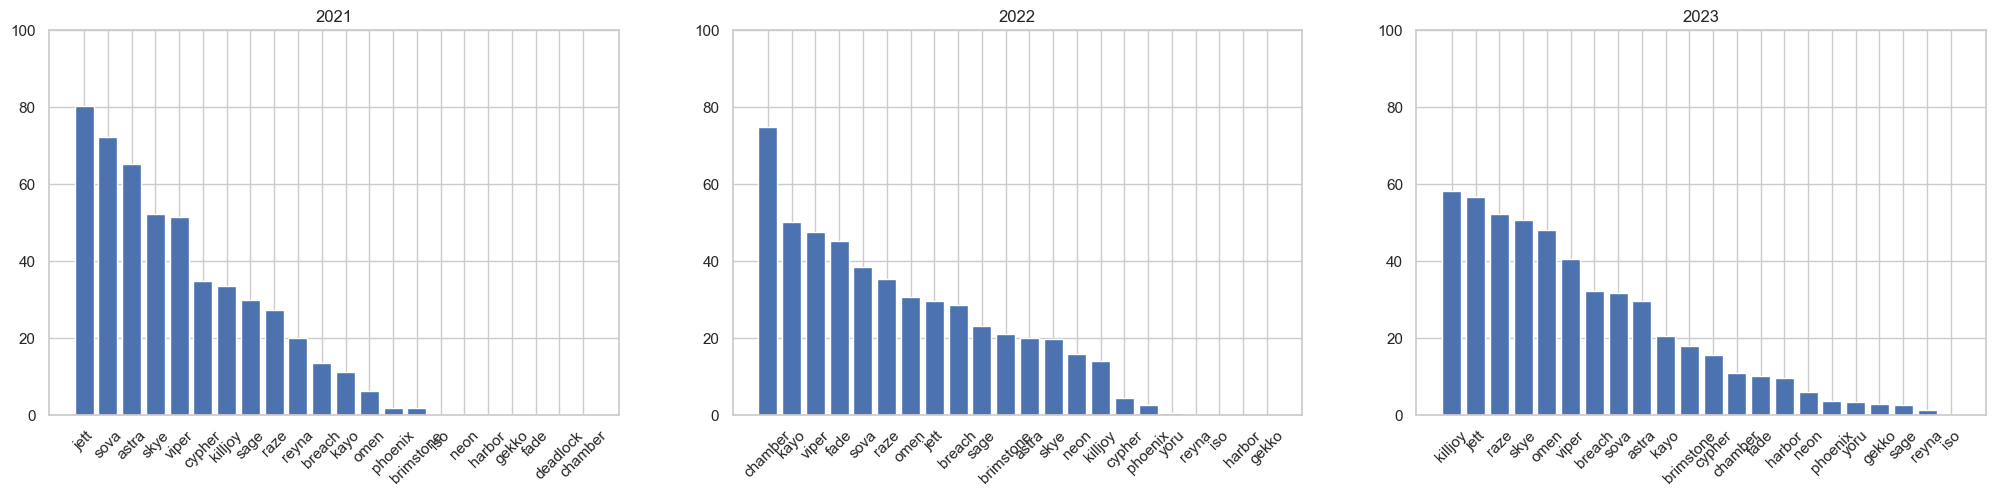

In [10]:
#sns.set_palette(personalizado_paleta)

fig, axs = plt.subplots(1, 3, figsize=(25, 5))

agents_vct2021_ord = func.agentsYear(agents_vct2021, 2021)
axs[0].bar(agents_vct2021_ord["Agent"], agents_vct2021_ord["Pick Rate"])
axs[0].set_ylim(0, 100)
axs[0].set_title('2021')
axs[0].tick_params(axis='x', rotation=45) 

agents_vct2022_ord = func.agentsYear(agents_vct2022, 2022)
axs[1].bar(agents_vct2022_ord["Agent"], agents_vct2022_ord["Pick Rate"])
axs[1].set_ylim(0, 100)
axs[1].set_title('2022')
axs[1].tick_params(axis='x', rotation=45)  

agents_vct2023_ord = func.agentsYear(agents_vct2023, 2023)
axs[2].bar(agents_vct2023_ord["Agent"], agents_vct2023_ord["Pick Rate"])
axs[2].set_ylim(0, 100)
axs[2].set_title('2023')
axs[2].tick_params(axis='x', rotation=45) 

plt.show()

<h5>3.1.5 Comparação das escolhas nos três anos</h5>

Neste gráfico, também estamos explorando a porcentagem de escolha dos agentes no VCT. Cada barra colorida representa a jornada de um agente específico, mostrando como sua porcentagem variou ao longo do tempo. À medida que navegamos pelo gráfico, notamos que alguns agentes têm uma presença constante, mantendo uma base sólida de escolha ao longo dos dos anos. Outros, por sua vez, têm picos de popularidade em determinados momentos, devido a atualizações de jogo, como já foi dito antes.

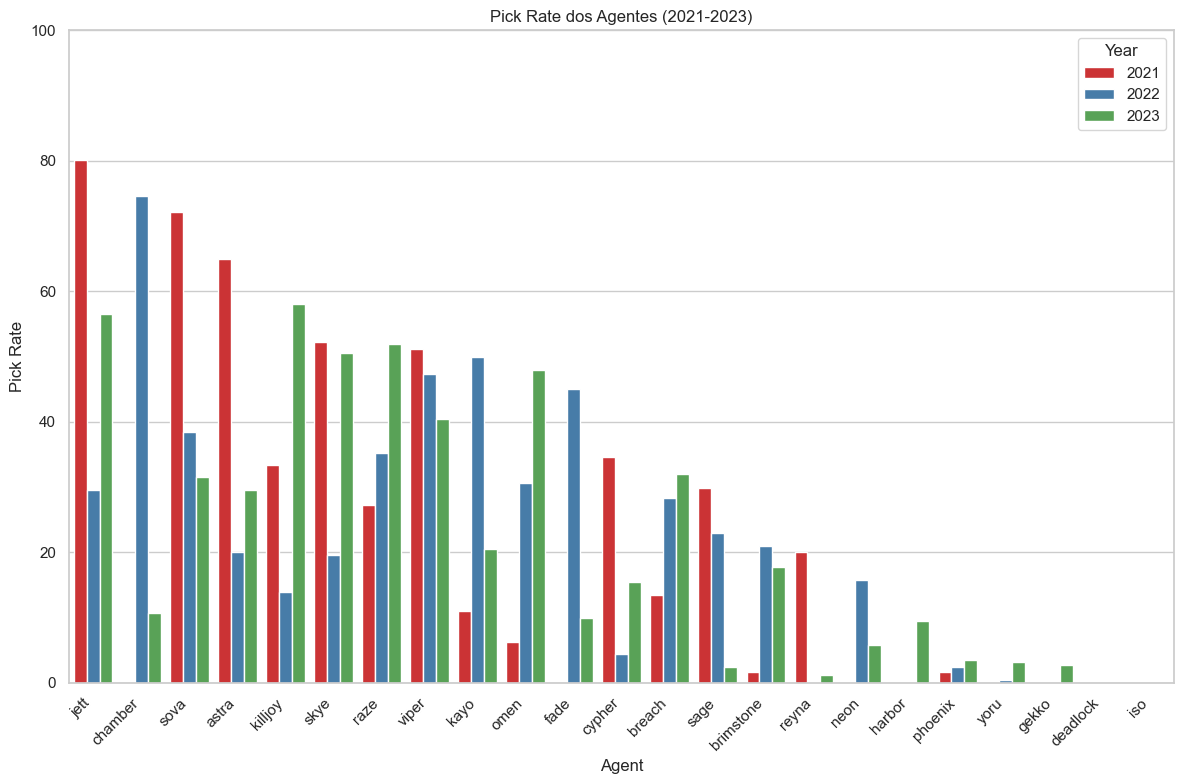

In [11]:
agents_vct_ord = pd.concat([agents_vct2021_ord, agents_vct2022_ord, agents_vct2023_ord], axis=0)

agents_vct_ord.sort_values(by="Pick Rate", ascending=False, inplace=True)

# Configurações para o gráfico de barras
plt.figure(figsize=(12, 8))

# Cria o gráfico de barras com o DataFrame 'agents_vct_ord'
sns.barplot(data=agents_vct_ord, x="Agent", y="Pick Rate", hue="Year", palette='Set1')

plt.ylim(0, 100)  
plt.xticks(rotation=45, ha='right')  
plt.title('Pick Rate dos Agentes (2021-2023)')  
plt.tight_layout()  

# Exibe o gráfico
plt.show()

<h3>3.2 Qual é a distribuição percentual de vitórias na defesa e no ataque nos mapas jogados?</h3>

Aplicando a função merge às tabelas dos `maps_vct2021, maps_vct2022 e maps_vct2023`, obteremos uma visualização lado a lado dos dados importados.

In [12]:
maps_vct_2_years= pd.merge(maps_vct2021, maps_vct2022, on='Map', how='outer')

maps_vct_total = pd.merge (maps_vct_2_years, maps_vct2023, on='Map', how='outer')

maps_vct_total = maps_vct_total.fillna(0, inplace=False)

maps_vct_total

,Map,Attacker Side Win Percentage_x,Defender Side Win Percentage_x,Attacker Side Win Percentage_y,Defender Side Win Percentage_y,Attacker Side Win Percentage,Defender Side Win Percentage
0,Ascent,46.8,53.2,45.0,55.0,51.00,49.00
1,Bind,46.8,53.2,52.6,47.4,49.00,51.00
2,Breeze,51.6,48.4,51.4,48.6,0.00,0.00
3,Fracture,0.0,0.0,48.0,52.0,51.75,48.25
4,Haven,50.6,49.4,50.2,49.8,51.50,48.50
5,Icebox,52.8,47.2,49.6,50.4,0.00,0.00
6,Lotus,0.0,0.0,0.0,0.0,57.00,43.00
7,Pearl,0.0,0.0,47.0,53.0,42.75,57.25
8,Split,44.0,56.0,48.0,52.0,53.50,46.50


Alguns mapas estão com porcentagens zeradas devido à rotação de mapas do Valorant, que muda a cada ano, adicionando ou removendo mapas nos campeonatos. Como resultado, foi necessário fazer uma média para preencher corretamente todos os dados, além disso as colunas foram renomeadas.

In [13]:
maps_vct_total = func.mediaMap(maps_vct_total)

maps_vct_total.columns = ['Map', 'Ataque (%) - 2021', 'Defesa (%) - 2021', 'Ataque (%) - 2022','Defesa (%) - 2022', 'Ataque (%) - 2023', 'Defesa (%) - 2023']
agentes_2021_2022_2023.head(5)

maps_vct_total

,Map,Ataque (%) - 2021,Defesa (%) - 2021,Ataque (%) - 2022,Defesa (%) - 2022,Ataque (%) - 2023,Defesa (%) - 2023
0,Ascent,46.8,53.2,45.0,55.0,51.00,49.00
1,Bind,46.8,53.2,52.6,47.4,49.00,51.00
2,Breeze,51.6,48.4,51.4,48.6,51.50,48.50
3,Fracture,49.9,50.1,48.0,52.0,51.75,48.25
4,Haven,50.6,49.4,50.2,49.8,51.50,48.50
5,Icebox,52.8,47.2,49.6,50.4,51.20,48.80
6,Lotus,57.0,43.0,57.0,43.0,57.00,43.00
7,Pearl,44.9,55.1,47.0,53.0,42.75,57.25
8,Split,44.0,56.0,48.0,52.0,53.50,46.50


<h5>3.2.1 Porcentagem de Vitória nos lados ataque e defesa</h5>


Para a segunda análise, iremos avaliar os mapas do Valorant e verificar, dependendo do mapa, qual lado será mais fácil de jogar. Com o intuito de visualizar os dados de 2021,2022 e 2023, foi criado um boxplot para observar a mediana, média, quartis e possíveis outliers do lado do ataque e do lado da defesa. Para isso, iremos concatenar as três tabelas dos anos.

In [14]:
maps_vct = pd.concat([maps_vct2021, maps_vct2022, maps_vct2023])

Ataque:

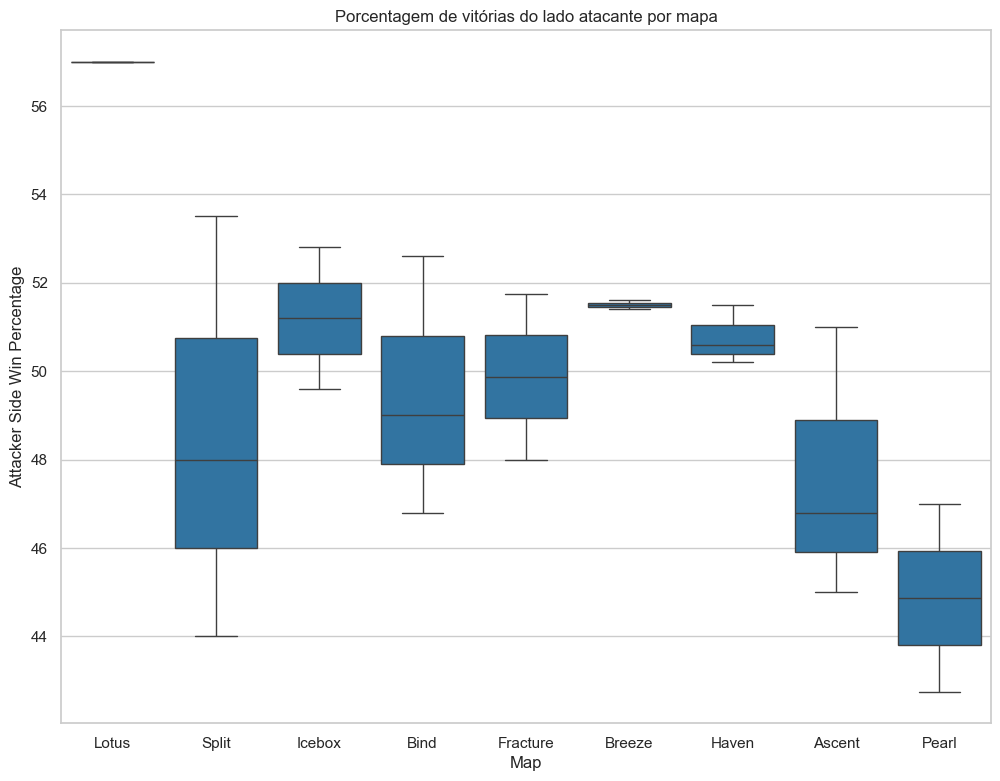

In [15]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Map', y='Attacker Side Win Percentage', data = maps_vct, order = maps_vct.sort_values('Attacker Side Win Percentage', ascending=False,)['Map'], color= personalizado_paleta[0])
plt.xticks(rotation=0)
plt.title('Porcentagem de vitórias do lado atacante por mapa')
plt.show()

Defesa:

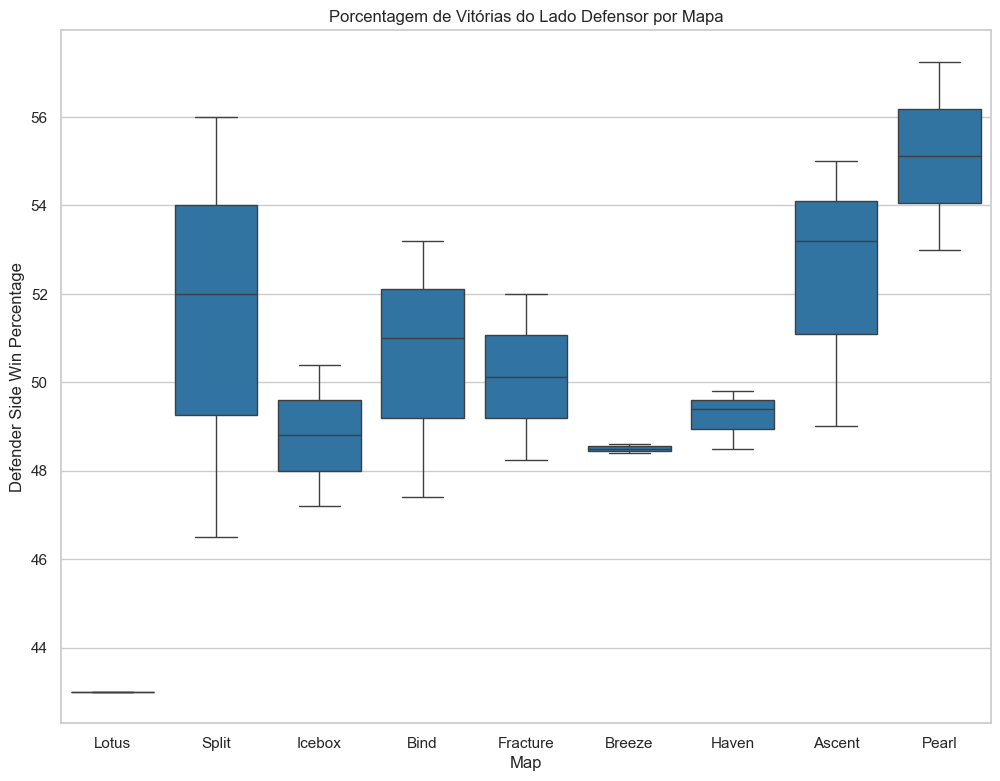

In [16]:

plt.figure(figsize=(12, 9))
sns.boxplot(x='Map', y='Defender Side Win Percentage', data=maps_vct, order=maps_vct.sort_values('Attacker Side Win Percentage', ascending=False)['Map'], color=personalizado_paleta[0])
plt.xticks(rotation=0)
plt.title('Porcentagem de Vitórias do Lado Defensor por Mapa')
plt.show()

<h5>3.2.2 Porcentagem Geral dos Mapas em relação a Vitória nos lados ataque e defesa</h5>


Ao visualizar o gráfico, é possível observar que no mapa "Lotus", as vitórias são mais prováveis quando se está do lado do ataque, enquanto no mapa "Perl" a vantagem está do lado da defesa, assim como no mapa "Ascent". Nos outros mapas, no entanto, as porcentagens não variam muito, com as vitórias ficando quase empatadas entre os lados atacante e defensor.

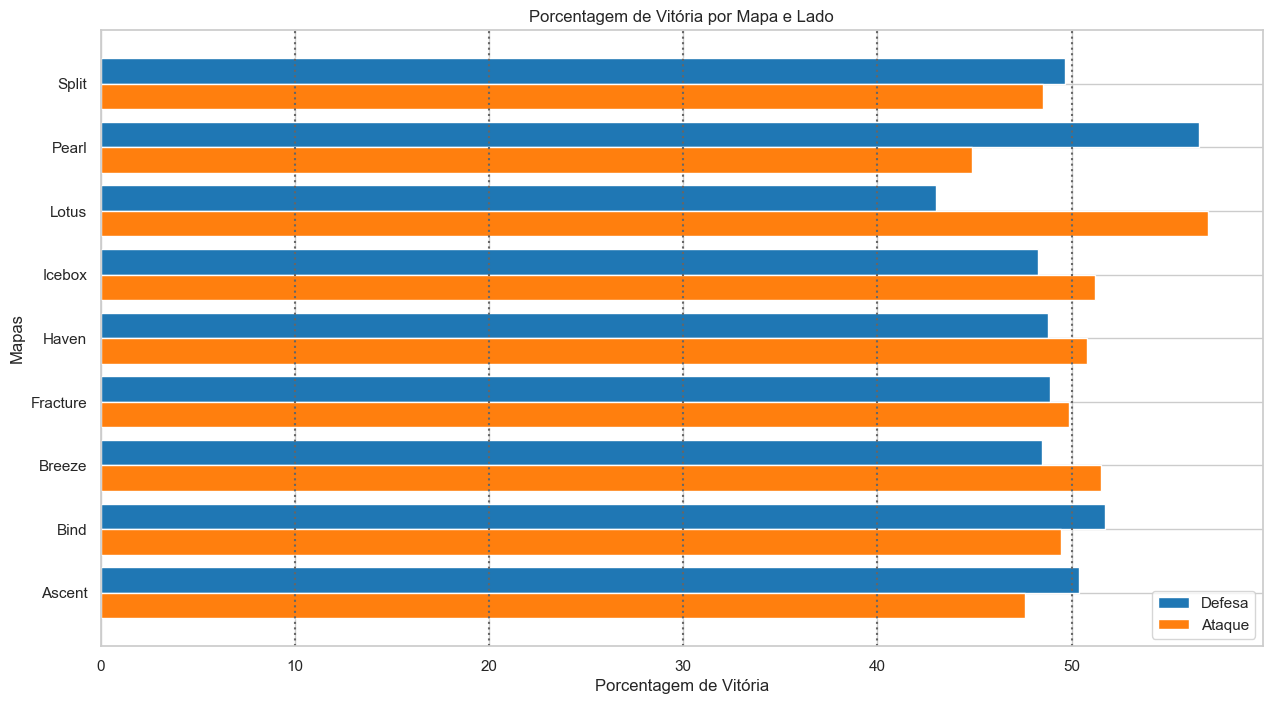

In [17]:
maps_vct_total['Total Attacker Side Win Percentage'] = maps_vct_total[['Ataque (%) - 2021', 'Ataque (%) - 2022', 'Ataque (%) - 2023']].mean(axis=1).round(2)

maps_vct_total['Total Defender Side Win Percentage'] = maps_vct_total[['Defesa (%) - 2021', 'Defesa (%) - 2023', 'Defesa (%) - 2023']].mean(axis=1).round(2)

maps_vct_final =  pd.concat([maps_vct_total['Map'], maps_vct_total['Total Attacker Side Win Percentage'], maps_vct_total ['Total Defender Side Win Percentage']], axis=1)

maps_vct_final = maps_vct_final.fillna(0, inplace=False)

func.mostraGraficoMap(maps_vct_final)

<img src='assets/img-maps/maps.png'></img>

<h3>3.3 Qual o melhor jogador de valorant nos campeonatos internacionais durantes os anos?</h3>

<h5>3.3.1 Avaliação do melhor jogador</h5>

Para avaliar o melhor jogador, foram analisadas suas estatísticas nos campeonatos internacionais, que são o Masters, Lock-in e a Final do Champions. Foi realizada uma filtragem de dados, analisando todos os jogadores participantes desses campeonatos. Foram consideradas a maior média de kills, kills por round, dano por round, % de Tiro na Cabeça e o K/D (número de kills dividido pelo número de mortes). Dessa forma, não é apenas o jogador com o maior número de kills que se destaca, mas sim aquele que consegue trabalhar em equipe e ter um desempenho coletivo.

<h5>3.3.1.1 Limpeza e Organização dos dados </h5>

As colunas de interesse são aquelas que contêm a média dos dados de Kills, Kills Per Round, Average Damage Per Round, Headshot % e Kills:Deaths. Desse modo, iremos eliminar as colunas que não contém a palavra 'Mean' e depois aplicar uma ordenação e encontrar o melhor de cada ano.

In [18]:
display(best_player_vct2021)
display(best_player_vct2022)
display(best_player_vct2023)

,Player,Kills,Kills Per Round,Average Damage Per Round,Headshot %,Kills:Deaths,Kills Mean,Kills Per Round Mean,Average Damage Per Round Mean,Headshot % Mean,Kills:Deaths Mean
0,Chronicle,590,0.900000,169.880000,28.200000,1.592000,118.0,0.900000,169.880000,28.200000,1.592000
1,Derke,596,0.783333,152.066667,26.333333,1.046667,119.2,0.783333,152.066667,26.333333,1.046667
2,nAts,552,0.900000,170.633333,31.000000,1.400000,110.4,0.900000,170.633333,31.000000,1.400000


,Player,Kills,Kills Per Round,Average Damage Per Round,Headshot %,Kills:Deaths,Kills Mean,Kills Per Round Mean,Average Damage Per Round Mean,Headshot % Mean,Kills:Deaths Mean
0,yay,920,0.926667,156.400000,28.000000,1.403333,184.000000,0.926667,156.400000,28.000000,1.403333
1,yay,834,0.880000,156.033333,25.666667,1.286667,166.800000,0.880000,156.033333,25.666667,1.286667
2,ardiis,914,0.825000,150.575000,22.500000,1.177500,152.333333,0.825000,150.575000,22.500000,1.177500


,Player,Kills,Kills Per Round,Average Damage Per Round,Headshot %,Kills:Deaths,Kills Mean,Kills Per Round Mean,Average Damage Per Round Mean,Headshot % Mean,Kills:Deaths Mean
0,aspas,892,0.866667,153.833333,25.0,1.260000,178.4,0.866667,153.833333,25.0,1.260000
1,ZmjjKK,658,0.882500,162.275000,20.5,1.185000,131.6,0.882500,162.275000,20.5,1.185000
2,Less,624,0.816667,158.166667,28.0,1.213333,124.8,0.816667,158.166667,28.0,1.213333


Removendo as colunas desnecessárias

In [19]:
columns_del = ['Kills', 'Kills Per Round', 'Average Damage Per Round', 'Headshot %', 'Kills:Deaths']
best_player_vct2021 = best_player_vct2021.drop(columns=columns_del)
best_player_vct2022 = best_player_vct2022.drop(columns=columns_del)
best_player_vct2023 = best_player_vct2023.drop(columns=columns_del)

display(best_player_vct2021)
display(best_player_vct2022)
display(best_player_vct2023)


,Player,Kills Mean,Kills Per Round Mean,Average Damage Per Round Mean,Headshot % Mean,Kills:Deaths Mean
0,Chronicle,118.0,0.900000,169.880000,28.200000,1.592000
1,Derke,119.2,0.783333,152.066667,26.333333,1.046667
2,nAts,110.4,0.900000,170.633333,31.000000,1.400000


,Player,Kills Mean,Kills Per Round Mean,Average Damage Per Round Mean,Headshot % Mean,Kills:Deaths Mean
0,yay,184.000000,0.926667,156.400000,28.000000,1.403333
1,yay,166.800000,0.880000,156.033333,25.666667,1.286667
2,ardiis,152.333333,0.825000,150.575000,22.500000,1.177500


,Player,Kills Mean,Kills Per Round Mean,Average Damage Per Round Mean,Headshot % Mean,Kills:Deaths Mean
0,aspas,178.4,0.866667,153.833333,25.0,1.260000
1,ZmjjKK,131.6,0.882500,162.275000,20.5,1.185000
2,Less,124.8,0.816667,158.166667,28.0,1.213333


Fazendo a ordenação para cada ano.

In [33]:
best_player_vct2021 = best_player_vct2021.sort_values(by=[col for col in best_player_vct2021.columns if 'mean' in col])
best_player_vct2022 = best_player_vct2022.sort_values(by=[col for col in best_player_vct2022.columns if 'mean' in col])
best_player_vct2023 = best_player_vct2023.sort_values(by=[col for col in best_player_vct2023.columns if 'mean' in col])

print('O melhor player de 2021 foi:', best_player_vct2021['Player'].values[0])
print('O melhor player de 2022 foi:', best_player_vct2022['Player'].values[0])
print('O melhor player de 2023 foi:', best_player_vct2023['Player'].values[0])


O melhor player de 2021 foi: Chronicle
O melhor player de 2022 foi: yay
O melhor player de 2023 foi: aspas


<h5>3.3.1.2 Visualizando os dados </h5>

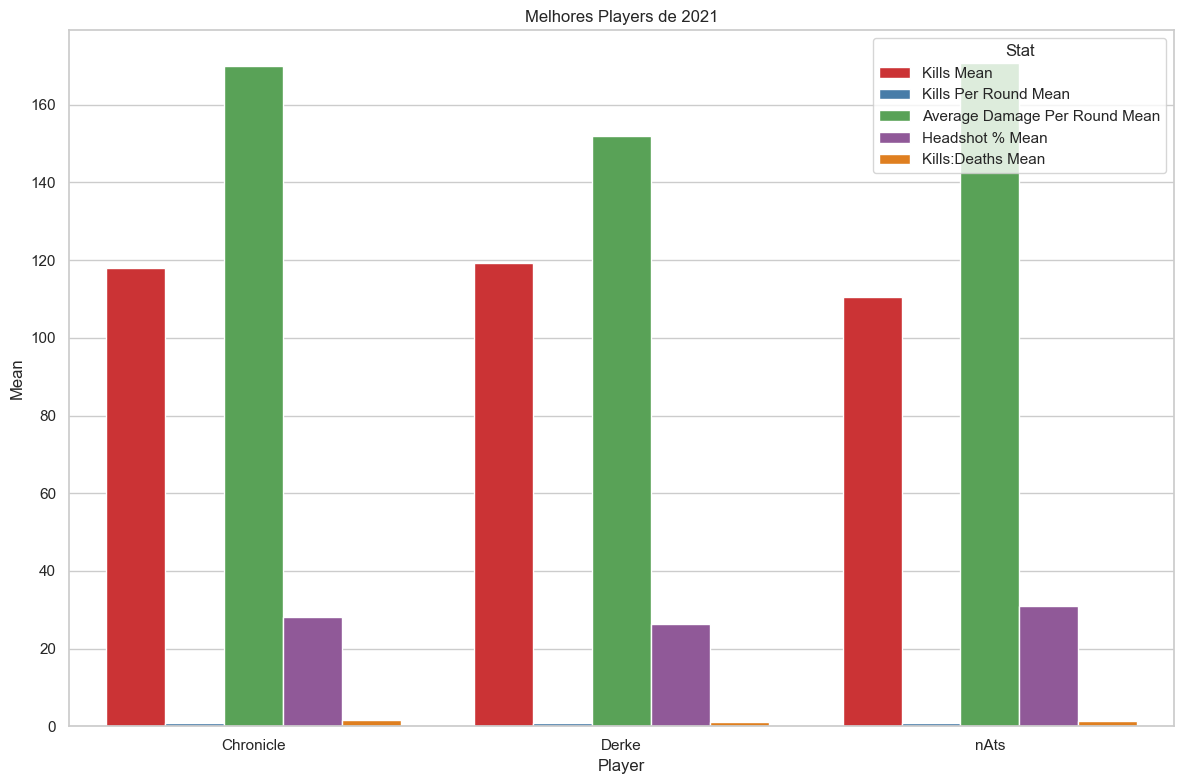

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=best_player_vct2021.melt(id_vars='Player', var_name='Stat', value_name='Value'), x="Player", y="Value", hue="Stat", palette='Set1')
plt.title('Melhores Players de 2021')
plt.xlabel('Player')
plt.ylabel('Mean')
plt.tight_layout()
plt.show()

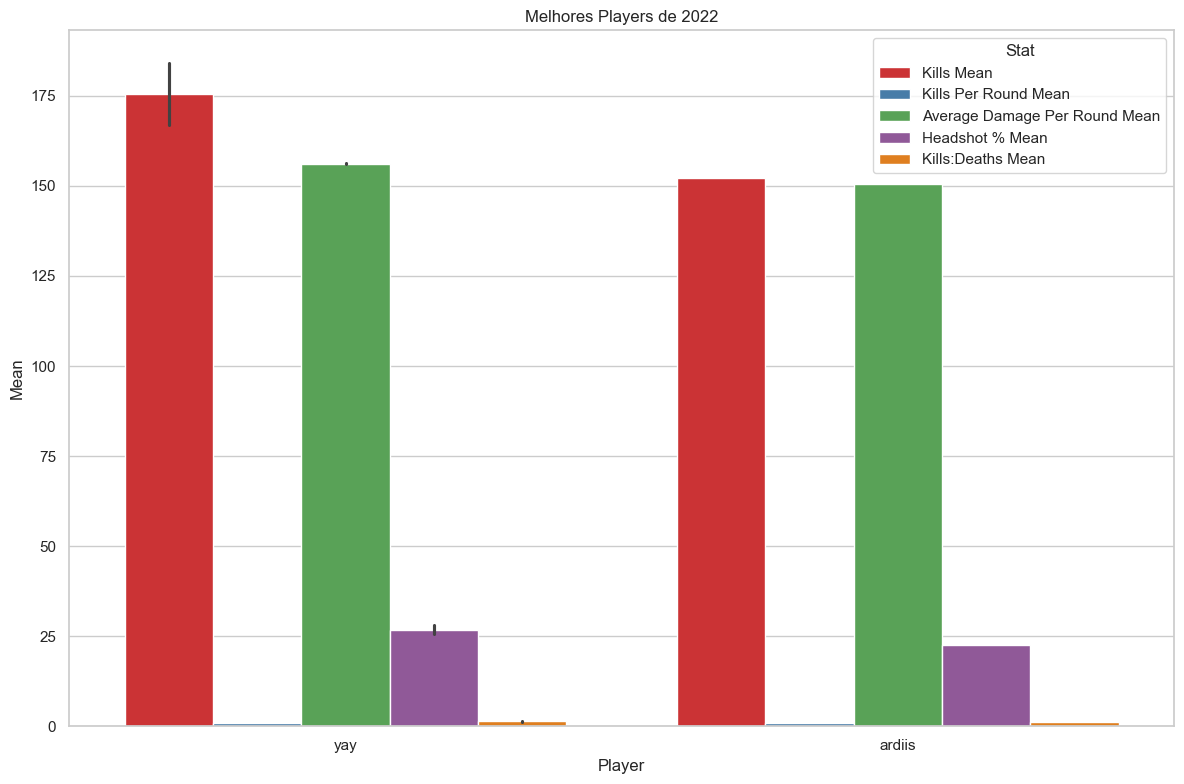

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=best_player_vct2022.melt(id_vars='Player', var_name='Stat', value_name='Value'), x="Player", y="Value", hue="Stat", palette='Set1')
plt.title('Melhores Players de 2022')
plt.xlabel('Player')
plt.ylabel('Mean')
plt.tight_layout()
plt.show()

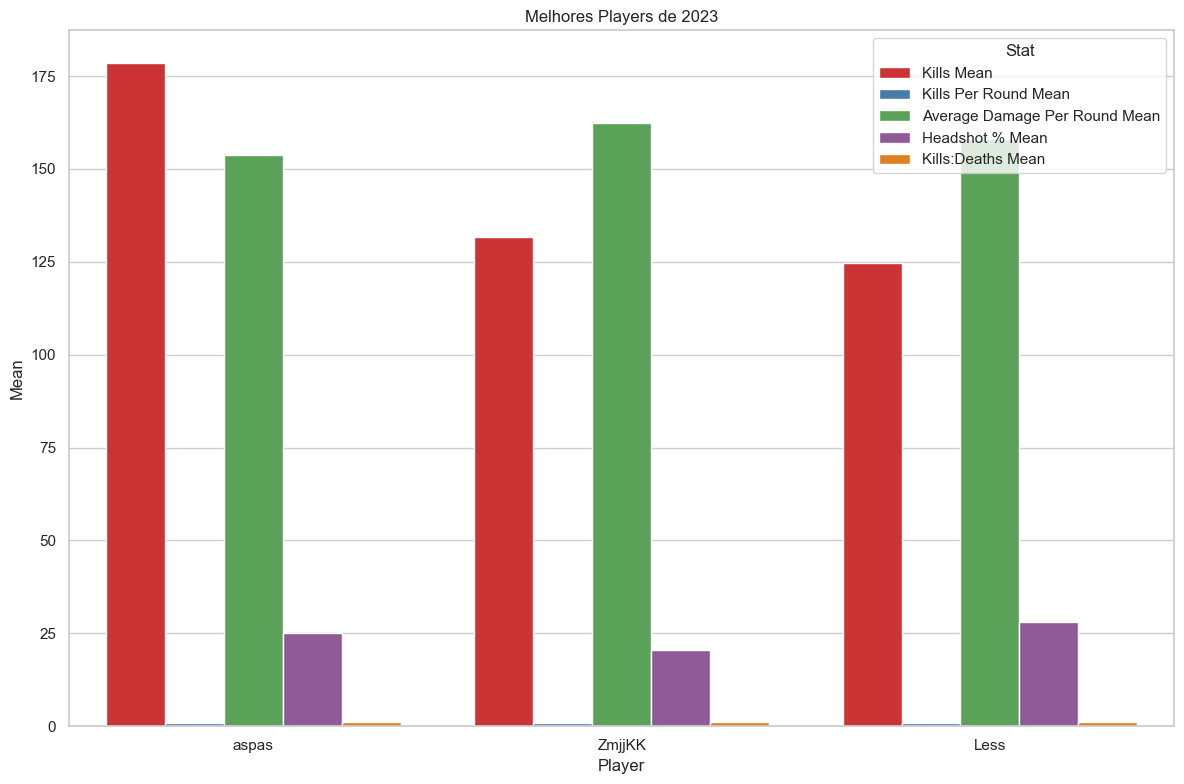

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=best_player_vct2023.melt(id_vars='Player', var_name='Stat', value_name='Value'), x="Player", y="Value", hue="Stat", palette='Set1')
plt.title('Melhores Players de 2023')
plt.xlabel('Player')
plt.ylabel('Mean')
plt.tight_layout()
plt.show()

<img src='assets/img-players/players.png'></img>

<h3>3.4 Qual o desempenho dos times brasileiros nos campeonatos internacionais durantes os anos?</h3>

In [20]:
overview2021 = pd.read_csv("dataset/vct_2021/matches/overview.csv")
overview2022 = pd.read_csv("dataset/vct_2022/matches/overview.csv")
overview2023 = pd.read_csv("dataset/vct_2023/matches/overview.csv")

br_teams_2021 = ["FURIA", "Keyd Stars", "Team Vikings"]
br_teams_2022 = ["FURIA", "LOUD"]
br_teams_2023 = ["LOUD", "FURIA", "MIBR"]

br_acs2021 = func.acsOverview(br_teams_2021, overview2021)
br_acs2022 = func.acsOverview(br_teams_2022, overview2022)
br_acs2023 = func.acsOverview(br_teams_2023, overview2023)

br_acs = pd.concat([br_acs2021, br_acs2022, br_acs2023], axis=0)

br_acs

,Team,Matches Count,Mean ACS
0,FURIA,28,205.18
1,Keyd Stars,24,198.56
2,Team Vikings,32,202.01
0,FURIA,17,199.88
1,LOUD,20,216.63
0,LOUD,22,206.39
1,FURIA,13,193.63
2,MIBR,10,186.74


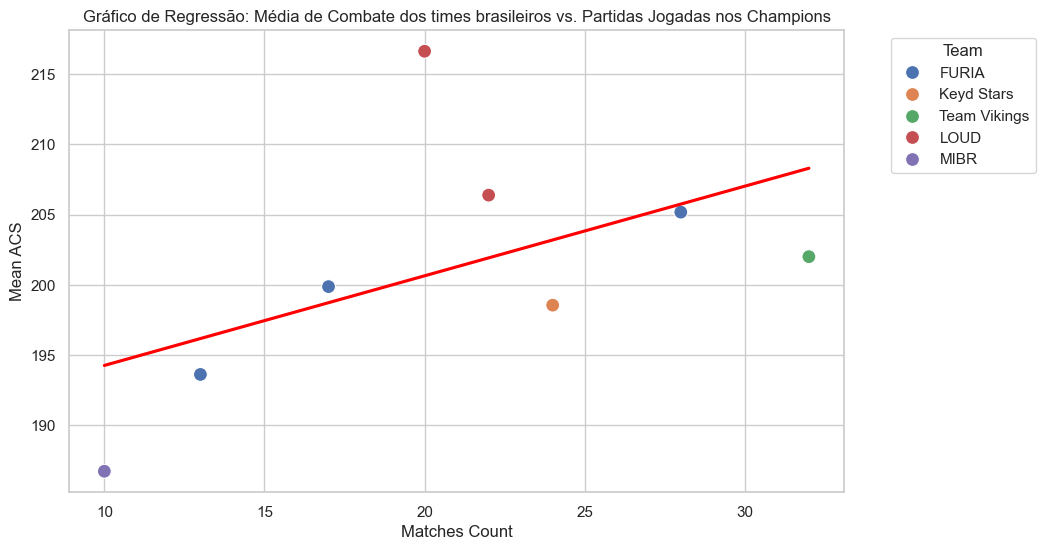

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(data=br_acs, x="Matches Count", y="Mean ACS", hue='Team', s=100)
regplot = sns.regplot(data=br_acs, x="Matches Count", y="Mean ACS", scatter=False, line_kws={"color": "red"}, ci=None)

plt.title('Gráfico de Regressão: Média de Combate dos times brasileiros vs. Partidas Jogadas nos Champions')
plt.xlabel('Matches Count')
plt.ylabel('Mean ACS')

plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<h2>6. Explorando Agrupamentos</h2>

In [22]:
ovw2021_group = overview2021[["Average Combat Score", "Average Damage per Round"]]
ovw2021_group = ovw2021_group [ ovw2021_group['Average Combat Score'] >= 0]
overview2021_group = ovw2021_group.dropna()

ovw2022_group = overview2022[["Average Combat Score", "Average Damage per Round"]]
ovw2022_group = ovw2022_group [ ovw2022_group['Average Combat Score'] >= 0]
overview2022_group = ovw2022_group.dropna()

ovw2023_group = overview2023[["Average Combat Score", "Average Damage per Round"]]
ovw2023_group = ovw2023_group [ ovw2023_group['Average Combat Score'] >= 0]
overview2023_group = ovw2023_group.dropna()

overview_group = pd.concat([overview2021_group, overview2022_group, overview2023_group], axis=0, ignore_index=True)

<h3>Ano 2021<h3>

In [23]:
kmeans = KMeans(n_clusters=3)

In [24]:
kmeans.fit(overview2021_group)


KMeans(n_clusters=3)

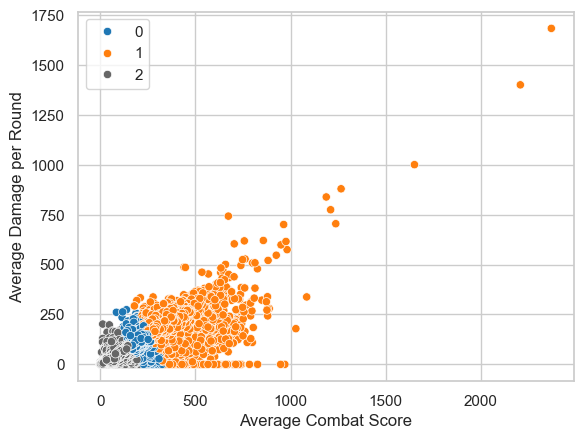

In [25]:
sns.scatterplot(data=overview2021_group, x="Average Combat Score", y="Average Damage per Round", hue=kmeans.labels_, palette= personalizado_paleta)

plt.show()

<h3>Ano 2022<h3>

In [26]:
kmeans.fit(overview2022_group)

KMeans(n_clusters=3)

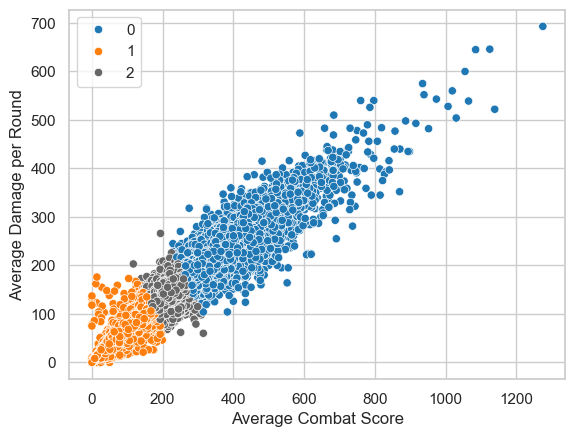

In [27]:
sns.scatterplot(data=overview2022_group, x="Average Combat Score", y="Average Damage per Round", hue=kmeans.labels_, palette= personalizado_paleta)

plt.show()

<h3>Ano 2023<h3>

In [28]:
kmeans.fit(overview2023_group)

KMeans(n_clusters=3)

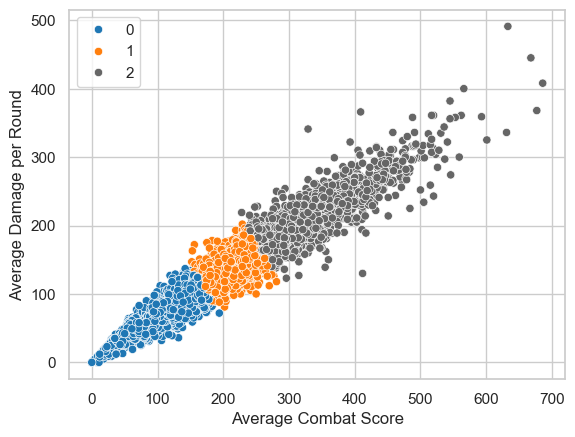

In [29]:
sns.scatterplot(data=overview2023_group, x="Average Combat Score", y="Average Damage per Round", hue=kmeans.labels_, palette= personalizado_paleta)

plt.show()

In [30]:
kmeans.fit(overview_group)

KMeans(n_clusters=3)

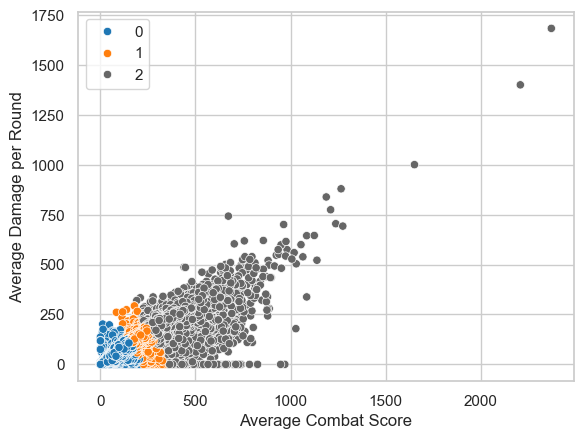

In [31]:
sns.scatterplot(data=overview_group, x="Average Combat Score", y="Average Damage per Round", hue=kmeans.labels_, palette= personalizado_paleta)

plt.show()

<h3>6.1 Questionamentos</h3>
<h4>6.1.1 Algum padrão foi detectado?</h4>

Sim, alguns padrões foram detectados. Percebe-se que em grande parte dos casos o aumento do dano médio por rodada (Average Damage per Round) está diretamente relacionado a pontuação média de combate (Average Combat Score). É notório também que a maioria dos dados estão centralizados em uma parte do gráfico, o que indica que a maior parte dos jogadore seguem um mesmo padrão. Também fica evidente que como os dados seguem um padrão, os pontos que possuem o Average Damage per Round igual a zero podem ser considerados outliers.


<h4>6.1.2 Alguma nova pergunta foi descoberta ao analisar os agrupamentos?</h4>

Sim, surgiu um novo questionamento. Será possível afirmar, a partir da análise dos agrupamentos e dos pontos, que a pontuação média de combate (Average Combat Score) é um fator determinante para o dano médio por rodada (Average Damage per Round) ou existem outros fatores que influenciam diretamente nesse resultado?

<h3>7. Conclusão</h3>

Analisando os dados de Valorant, fica evidente que cada partida é singular, com suas próprias dinâmicas e nuances. A seleção dos agentes é influenciada por ajustes de balanceamento ao longo do tempo, enquanto a distribuição de vitórias nos mapas revela estratégias particulares para ataque e defesa, embora seja perceptível que alguns mapas são mais propícios ao ataque e outros à defesa.

Os jogadores mais destacados, como Chronicle, Yay e Aspas, ilustram a importância do desempenho individual, mas também coletivo, visto que suas estatísticas mostram uma grande comperatividade com seus respectivos times no cenário competitivo. Além disso, o crescimento do rendimento dos times brasileiros ao longo dos anos reflete o amadurecimento da cena competitiva regional.

No entanto, a redução no número de times brasileiros participando de campeonatos internacionais aponta desafios e oportunidades para a expansão global da presença brasileira em Valorant. Isso ressalta a necessidade de investimento contínuo e apoio para fortalecer ainda mais a cena competitiva nacional e manter uma presença relevante no cenário internacional.

Para análises futuras, explorar mais a fundo as estratégias específicas de cada agente e mapa, bem como compreender os padrões de desempenho dos jogadores e times, pode fornecer insights valiosos para aqueles que buscam se destacar no competitivo de Valorant, além de analisar os anos futuros.